In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def read_file(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            numbers = line.strip().split(' ')
            label = float(numbers[0])
            grayscale = np.array([float(number) for number in numbers[1:]])
            if label == 1.0:
                label = -1.0
                data.append((label, grayscale))
            elif label == 5.0:
                label = 1.0
                data.append((label, grayscale))
    return data

In [2]:
train_data = read_file("ZipDigits.train")
test_data = read_file("ZipDigits.test")

In [3]:
def extract(data):
    intensities = []
    symmetrics = []
    labels = []
    
    for i in range(len(data)):
        labels.append(data[i][0])
        
        mid = int(len(data[i][-1])/2)
        intensity = np.mean(data[i][-1])
        intensities.append(intensity)
        
        left = data[i][-1][:mid]
        right = data[i][-1][mid:]
        diff = np.abs(left-right)
        symmetric = np.mean(diff)
        symmetrics.append(symmetric)
        
    return labels, intensities, symmetrics

In [4]:
train_labels, train_intensities, train_symmetrics = extract(train_data)
test_labels, test_intensities, test_symmetrics = extract(test_data)

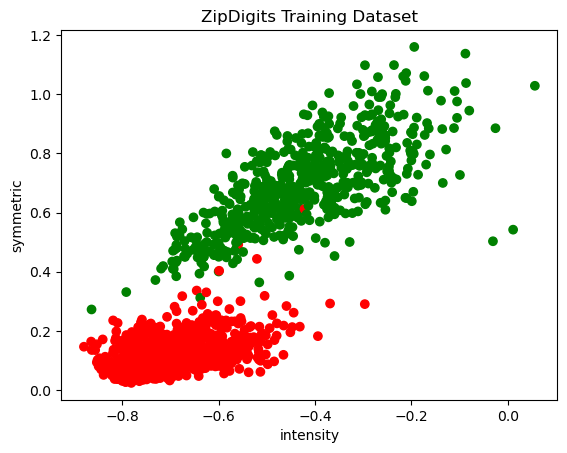

In [5]:
plt.scatter(train_intensities, train_symmetrics, c=ListedColormap(("red", "green"))(train_labels))
plt.title("ZipDigits Training Dataset")
plt.xlabel("intensity")
plt.ylabel("symmetric")
plt.show()